# 04b. Supervised machine learning - Discount vs Profit
## Notebook content:
    1. Importing libraries and data
    2. Data prep for regression analysis
    3. Regression analysis

## 1. Importing visualisation libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
path = r'C:\Users\bruna\Data Analysis Projects\2023-12 Superstore Sales Analysis'

In [4]:
# Import the sales data
sales_clean = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'sales_clean.pkl'))

## 2. Data prep for regression analysis

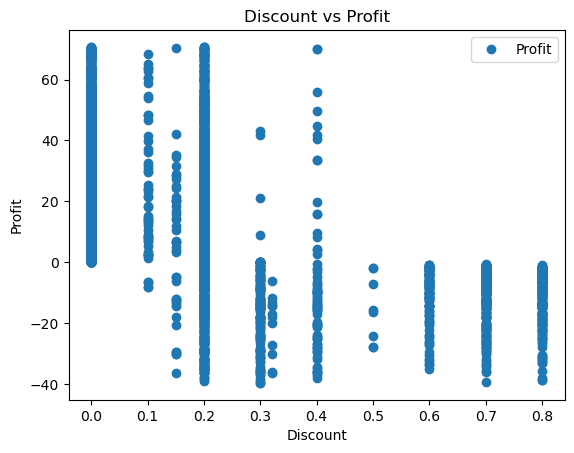

In [5]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

sales_clean.plot(x = 'Discount', y='Profit',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Discount vs Profit')  
plt.xlabel('Discount')  
plt.ylabel('Profit')  
plt.show()

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = sales_clean['Discount'].values.reshape(-1,1)
y = sales_clean['Profit'].values.reshape(-1,1)

In [8]:
X

array([[0. ],
       [0. ],
       [0.2],
       ...,
       [0. ],
       [0.2],
       [0. ]])

In [9]:
y

array([[41.9136],
       [ 6.8714],
       [ 2.5164],
       ...,
       [15.6332],
       [19.3932],
       [13.32  ]])

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 3. Regression analysis

In [11]:
# Create a regression object, which will be fit onto the training set

regression = LinearRegression()

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

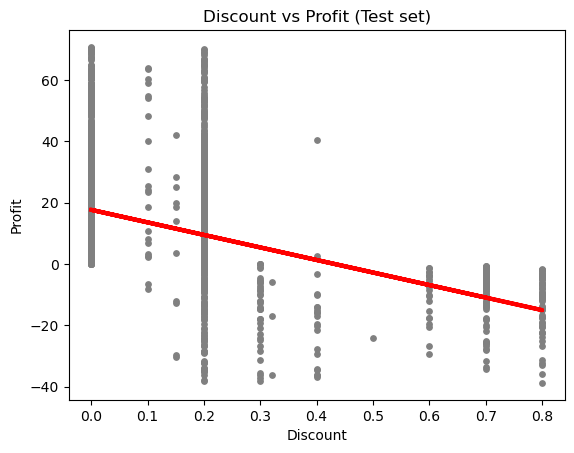

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Discount vs Profit (Test set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Profit')
plot_test.show()

In [15]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [16]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-40.87798829]]
Mean squared error:  284.6507254593366
R2 score:  0.18340402522715094


In [17]:
y_predicted

array([[-11.00392845],
       [ 17.61066335],
       [  9.43506569],
       ...,
       [ 17.61066335],
       [  9.43506569],
       [ 17.61066335]])

In [18]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,-0.9900,-11.003928
1,0.6312,17.610663
2,3.9852,9.435066
3,3.9102,17.610663
4,22.2980,9.435066
5,-33.1390,-15.091727
6,35.0400,17.610663
7,3.4048,9.435066
8,9.4700,17.610663
9,32.1300,9.435066


##### Compare how the regression fits the training set

In [19]:
# Predict 

y_predicted_train = regression.predict(X_train)

In [20]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [21]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-40.87798829]]
Mean squared error:  282.00357568119887
R2 score:  0.18722124511974048


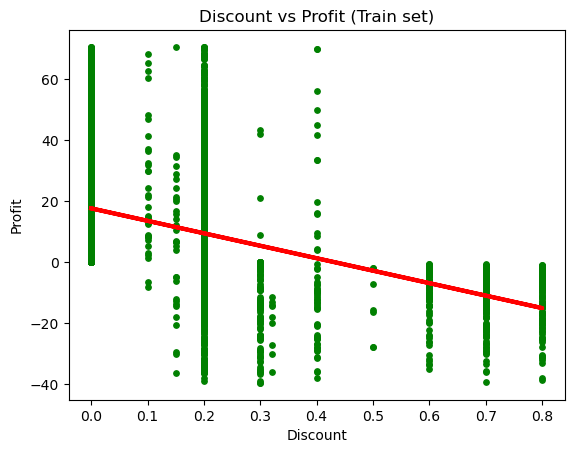

In [22]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Discount vs Profit (Train set)')
plot_test.xlabel('Discount')
plot_test.ylabel('Profit')
plot_test.show()

##### Conclusion:
- The linear model (red line) doens't perfectly fit the data points.
- The statistical summary also show that the model isn't performing very wel: The slope shows a strong negative relationship. However, MSE is quote big, indicating a line far from the data point , and R2 score is quite small, showing a poor fit of the model. 
- The same poor fit is observed when comparing the actual to the predicted values of y (which are very different to each other).
- Conclusion: while discount is an important factor in loss of profit, it’s not the only one.